<a href="https://colab.research.google.com/github/AryaZade04/Machine_Learning_Lab/blob/main/ML_Practical4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Step 1: Sample dataset (10 records, 3 features)
data = np.array([
    [5.1, 3.5, 1.4],
    [4.9, 3.0, 1.4],
    [6.2, 3.4, 5.4],
    [5.9, 3.0, 5.1],
    [5.5, 2.3, 4.0],
    [6.5, 3.0, 5.8],
    [5.7, 2.8, 4.1],
    [6.3, 3.3, 6.0],
    [4.6, 3.1, 1.5],
    [5.0, 3.6, 1.4]
])

print("Sample dataset (10 records, 3 features):")
print(data)

Sample dataset (10 records, 3 features):
[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [6.2 3.4 5.4]
 [5.9 3.  5.1]
 [5.5 2.3 4. ]
 [6.5 3.  5.8]
 [5.7 2.8 4.1]
 [6.3 3.3 6. ]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]]


In [4]:
df= pd.DataFrame(data,columns=["X","Y","Z"])
df

,X,Y,Z
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,6.2,3.4,5.4
3,5.9,3.0,5.1
4,5.5,2.3,4.0
5,6.5,3.0,5.8
6,5.7,2.8,4.1
7,6.3,3.3,6.0
8,4.6,3.1,1.5
9,5.0,3.6,1.4


In [5]:
#Step 2: Standarization using pandas (avoids NaN issues)
standarized_data = (df - df.mean()) / df.std()

In [6]:
#Step 3: Covariance Matrix
cov_matrix = np.cov(standarized_data.T)

In [7]:
#Step 4: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [9]:
#Step 5: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

In [10]:
#Step 6: Select top 2 eigenvectors
eig_vecs_subset = eig_vecs[:, :2]

In [11]:
#Step 7: Project data to new basis
reduced_data = standarized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])

In [12]:
#Step 8: Output the reduced data
print("Reduced Data:")
print(reduced_df)

Reduced Data:
        PC1       PC2
0  1.494208  0.774296
1  1.419699 -0.572715
2 -1.116974  1.053780
3 -0.925093 -0.084282
4 -0.516977 -2.052564
5 -1.796600  0.153505
6 -0.477689 -0.701916
7 -1.489028  0.855740
8  1.753521 -0.419999
9  1.654933  0.994154


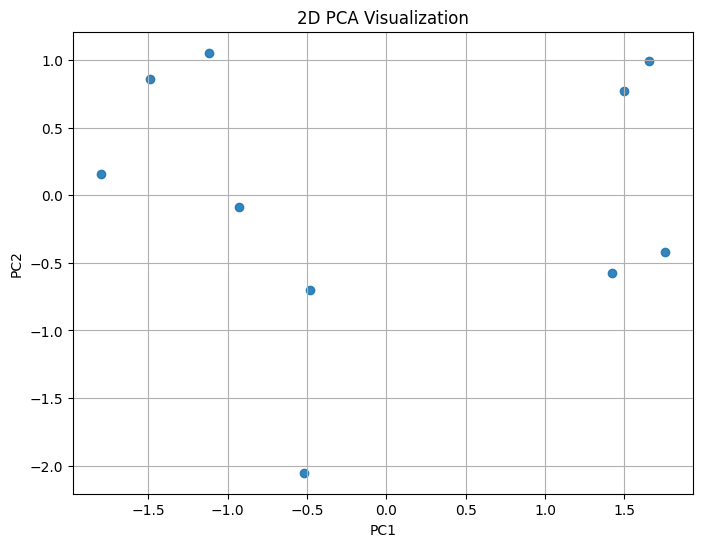

In [14]:
#step 9: Visualize
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df["PC1"], reduced_df["PC2"], alpha=0.9)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Visualization")
plt.grid(True)
plt.show()